In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

import tensorflow.keras as keras
import tensorflow.keras.backend as k

from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, Callback, TensorBoard
from tensorflow.keras.utils import Sequence, plot_model

from IPython.display import Image

In [2]:
from root_pandas import read_root

Welcome to JupyROOT 6.18/04


In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

In [4]:
fDataName = "./gun_k0L_allgev_FTFP_BERT_90000evt_ILD_l5_v02steel.root"
fDataName_mc = "./mc_gun_k0L_allgev_FTFP_BERT_90000evt_ILD_l5_v02steel.root"
fTreeName = "tree"
data = read_root(fDataName, fTreeName)
data_mc = read_root(fDataName_mc, fTreeName)

In [5]:
x = data
y = data_mc

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.1)

In [7]:
x_train.shape

(7962, 10)

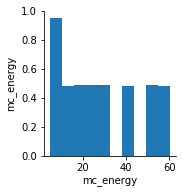

In [8]:
sns.pairplot(data_mc, kind="kde")

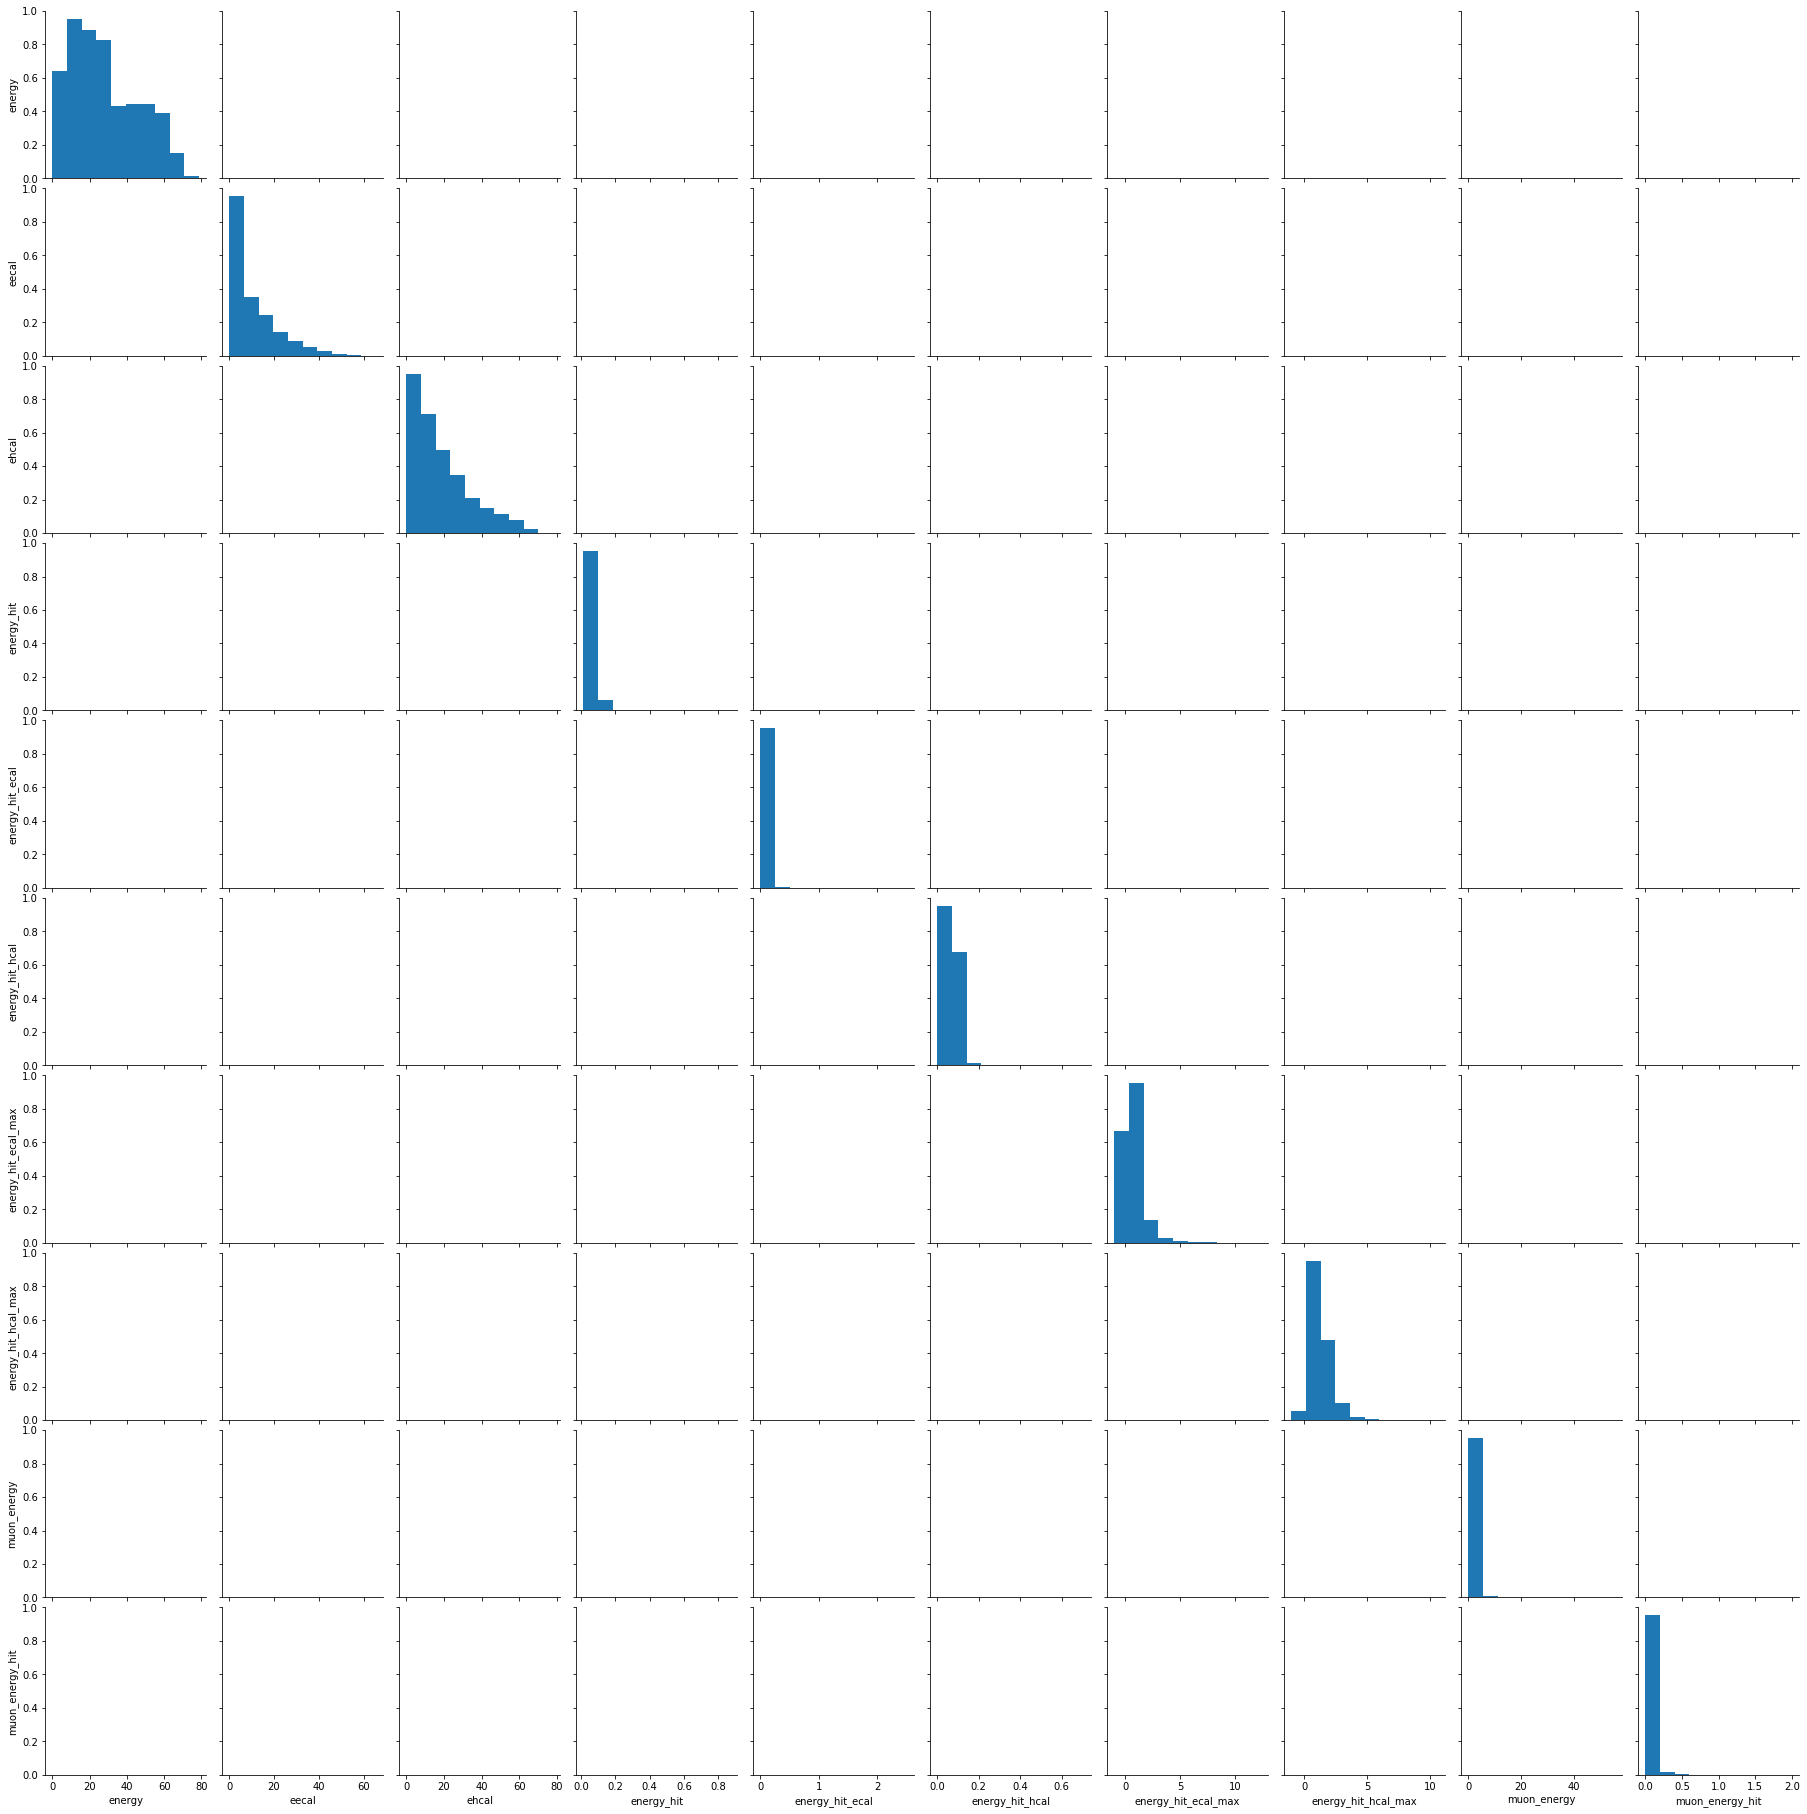

In [9]:
sns.pairplot(data, kind="kde")

In [10]:
#scaler = MinMaxScaler()

In [11]:
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.fit_transform(x_test)
#y_train_scaled = scaler.fit_transform(y_train)
#y_test_scaled = scaler.fit_transform(y_test)



In [12]:
#x = data[data.columns[:2]]

In [13]:
#x

In [14]:
#x_train_scaled = preprocessing.scale( x_train )

In [15]:
#type(x_train)

In [16]:
#type(x_train_scaled)

In [17]:
#y_train_scaled = preprocessing.scale( y_train )

In [18]:
#y_train_scaled

In [19]:
#x_test_scaled = preprocessing.scale( x_test )

In [20]:
#y_test_scaled = preprocessing.scale( y_test )

In [21]:
def loss1(y_true, y_pred):
    return k.mean( k.square( (y_pred - y_true) / (y_true)  ) )

In [22]:
def metric1(y_true, y_pred):
    return ( y_pred - y_true ) / ( y_true )

In [23]:
def metric2(y_true, y_pred):
    return k.mean( ( y_pred - y_true ) / ( y_true ) )

In [24]:
model = Sequential()
model.add(Dense(64, activation='tanh', input_dim=x_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1))

'''
a = Input(shape=x_train.shape[1])
b = Dense(8)(a)
b = Dropout(rate=0.5)(b)
b = Activation('tanh')(b)
b = Dense(4)(a)
b = Dropout(rate=0.5)(b)
b = Activation('tanh')(b)
c = Dense(1)(b)
model = Model(inputs = a, outputs = c)
'''

model.compile(loss='mean_squared_error', metrics=[metric1, metric2], optimizer='adam')
#model.compile(loss=loss1, metrics=[metric1, metric2], optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5

2020-03-30 02:45:43.338067: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-03-30 02:45:43.354560: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f9badb16d60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-03-30 02:45:43.354613: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [25]:
history = model.fit(x_train, y_train, epochs = 200, validation_data = (x_test, y_test))

Train on 7962 samples, validate on 71658 samples
Epoch 1/200
7962/7962 [==============================] - 3s 320us/sample - loss: 969.8343 - metric1: -0.8473 - metric2: -0.8473 - val_loss: 930.6661 - val_metric1: -0.7915 - val_metric2: -0.7915
Epoch 2/200
7962/7962 [==============================] - 2s 265us/sample - loss: 895.1540 - metric1: -0.7556 - metric2: -0.7557 - val_loss: 871.2575 - val_metric1: -0.7177 - val_metric2: -0.7177
Epoch 3/200
7962/7962 [==============================] - 2s 249us/sample - loss: 840.1475 - metric1: -0.6826 - metric2: -0.6825 - val_loss: 817.1950 - val_metric1: -0.6471 - val_metric2: -0.6471
Epoch 4/200
7962/7962 [==============================] - 2s 247us/sample - loss: 787.1098 - metric1: -0.6160 - metric2: -0.6161 - val_loss: 767.0607 - val_metric1: -0.5781 - val_metric2: -0.5782
Epoch 5/200
7962/7962 [==============================] - 2s 247us/sample - loss: 749.9680 - metric1: -0.5472 - metric2: -0.5472 - val_loss: 722.0706 - val_metric1: -0.5130

7962/7962 [==============================] - 2s 247us/sample - loss: 193.8586 - metric1: -0.0432 - metric2: -0.0430 - val_loss: 93.5811 - val_metric1: -0.1041 - val_metric2: -0.1041
Epoch 43/200
7962/7962 [==============================] - 2s 259us/sample - loss: 188.3693 - metric1: -0.0430 - metric2: -0.0430 - val_loss: 98.3458 - val_metric1: -0.1281 - val_metric2: -0.1282
Epoch 44/200
7962/7962 [==============================] - 2s 297us/sample - loss: 186.6956 - metric1: -0.0400 - metric2: -0.0399 - val_loss: 80.4598 - val_metric1: -0.0558 - val_metric2: -0.0558
Epoch 45/200
7962/7962 [==============================] - 2s 246us/sample - loss: 179.5580 - metric1: -0.0346 - metric2: -0.0348 - val_loss: 92.4150 - val_metric1: -0.1614 - val_metric2: -0.1614
Epoch 46/200
7962/7962 [==============================] - 2s 246us/sample - loss: 182.3839 - metric1: -0.0246 - metric2: -0.0245 - val_loss: 89.7022 - val_metric1: -0.1500 - val_metric2: -0.1500
Epoch 47/200
7962/7962 [==============

7962/7962 [==============================] - 2s 257us/sample - loss: 113.1226 - metric1: 0.0608 - metric2: 0.0606 - val_loss: 38.2750 - val_metric1: 0.0733 - val_metric2: 0.0733
Epoch 85/200
7962/7962 [==============================] - 2s 259us/sample - loss: 116.1779 - metric1: 0.0615 - metric2: 0.0614 - val_loss: 38.8725 - val_metric1: 0.0665 - val_metric2: 0.0665
Epoch 86/200
7962/7962 [==============================] - 2s 257us/sample - loss: 114.0082 - metric1: 0.0606 - metric2: 0.0605 - val_loss: 34.3244 - val_metric1: -0.0230 - val_metric2: -0.0230
Epoch 87/200
7962/7962 [==============================] - 2s 256us/sample - loss: 111.2109 - metric1: 0.0681 - metric2: 0.0681 - val_loss: 35.8610 - val_metric1: 0.0468 - val_metric2: 0.0468
Epoch 88/200
7962/7962 [==============================] - 2s 296us/sample - loss: 113.2297 - metric1: 0.0747 - metric2: 0.0749 - val_loss: 42.6173 - val_metric1: 0.0309 - val_metric2: 0.0309
Epoch 89/200
7962/7962 [==============================] 

Epoch 127/200
7962/7962 [==============================] - 2s 247us/sample - loss: 88.8099 - metric1: 0.1408 - metric2: 0.1407 - val_loss: 31.9169 - val_metric1: 0.0558 - val_metric2: 0.0558
Epoch 128/200
7962/7962 [==============================] - 2s 246us/sample - loss: 91.9883 - metric1: 0.1385 - metric2: 0.1385 - val_loss: 36.1143 - val_metric1: 0.1421 - val_metric2: 0.1420
Epoch 129/200
7962/7962 [==============================] - 2s 247us/sample - loss: 93.2292 - metric1: 0.1413 - metric2: 0.1410 - val_loss: 36.9585 - val_metric1: 0.1494 - val_metric2: 0.1494
Epoch 130/200
7962/7962 [==============================] - 2s 250us/sample - loss: 90.2377 - metric1: 0.1447 - metric2: 0.1446 - val_loss: 27.0462 - val_metric1: 0.1384 - val_metric2: 0.1383
Epoch 131/200
7962/7962 [==============================] - 2s 248us/sample - loss: 88.8545 - metric1: 0.1457 - metric2: 0.1455 - val_loss: 32.4091 - val_metric1: 0.1715 - val_metric2: 0.1714
Epoch 132/200
7962/7962 [====================

Epoch 170/200
7962/7962 [==============================] - 2s 247us/sample - loss: 86.0235 - metric1: 0.1837 - metric2: 0.1838 - val_loss: 29.8583 - val_metric1: 0.1170 - val_metric2: 0.1169
Epoch 171/200
7962/7962 [==============================] - 2s 246us/sample - loss: 86.1451 - metric1: 0.1722 - metric2: 0.1721 - val_loss: 25.3827 - val_metric1: 0.1604 - val_metric2: 0.1603
Epoch 172/200
7962/7962 [==============================] - 2s 247us/sample - loss: 87.6181 - metric1: 0.1806 - metric2: 0.1806 - val_loss: 33.1747 - val_metric1: 0.1532 - val_metric2: 0.1532
Epoch 173/200
7962/7962 [==============================] - 2s 246us/sample - loss: 87.3009 - metric1: 0.1850 - metric2: 0.1851 - val_loss: 30.1555 - val_metric1: 0.1747 - val_metric2: 0.1746
Epoch 174/200
7962/7962 [==============================] - 2s 247us/sample - loss: 87.3890 - metric1: 0.1772 - metric2: 0.1772 - val_loss: 31.0547 - val_metric1: 0.1836 - val_metric2: 0.1836
Epoch 175/200
7962/7962 [====================

In [26]:
#a = model.evaluate( x_train, y_train )
#b = model.evaluate( x_test, y_test )

In [27]:
history.history.keys()

dict_keys(['loss', 'metric1', 'metric2', 'val_loss', 'val_metric1', 'val_metric2'])

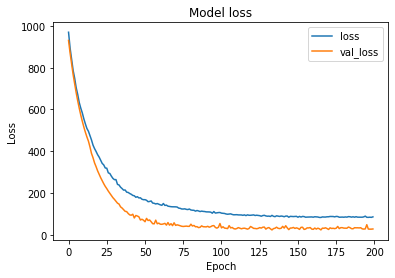

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
q = plt.show()

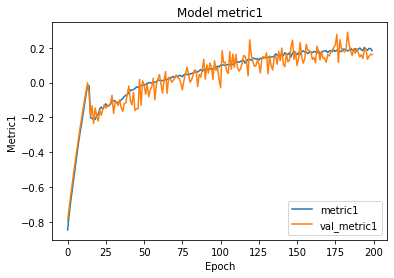

In [29]:
plt.plot(history.history['metric1'])
plt.plot(history.history['val_metric1'])
plt.title('Model metric1')
plt.ylabel('Metric1')
plt.xlabel('Epoch')
plt.legend(['metric1', 'val_metric1'], loc='lower right')
q = plt.show()

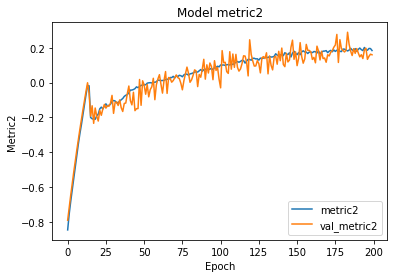

In [30]:
plt.plot(history.history['metric2'])
plt.plot(history.history['val_metric2'])
plt.title('Model metric2')
plt.ylabel('Metric2')
plt.xlabel('Epoch')
plt.legend(['metric2', 'val_metric2'], loc='lower right')
q = plt.show()

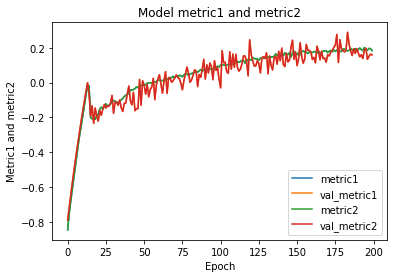

In [31]:
plt.plot(history.history['metric1'])
plt.plot(history.history['val_metric1'])
plt.plot(history.history['metric2'])
plt.plot(history.history['val_metric2'])
plt.title('Model metric1 and metric2')
plt.ylabel('Metric1 and metric2')
plt.xlabel('Epoch')
plt.legend(['metric1', 'val_metric1', 'metric2', 'val_metric2'], loc='lower right')
q = plt.show()

In [32]:
model.save('ANN.h5')
#model = load_model('ANN.h5')

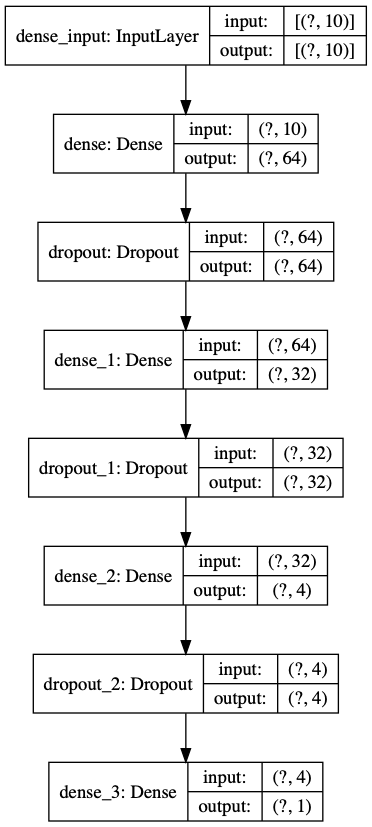

In [33]:
plot_model(model, to_file='model.png', show_shapes=True)
Image('model.png')

In [34]:
file5 = read_root("./data/gun_k0L_5gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", "tree")
file10 = read_root("./data/gun_k0L_10gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", "tree")
file15 = read_root("./data/gun_k0L_15gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", "tree")
file20 = read_root("./data/gun_k0L_20gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", "tree")
file25 = read_root("./data/gun_k0L_25gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", "tree")
file30 = read_root("./data/gun_k0L_30gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", "tree")
file40 = read_root("./data/gun_k0L_40gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", "tree")
file50 = read_root("./data/gun_k0L_50gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", "tree")
file60 = read_root("./data/gun_k0L_60gev_FTFP_BERT_5000evt_ILD_l5_v02steel.root", "tree")

In [35]:
#variables_test = (["n30", "n35", "n40", "n45", "n50", "n55", "n60", "n65", "n70", "n75", "n80", "nav", "c30", "c35", "c40", "c45", "c50", "c55", "c60", "c65", "c70", "c75", "c80", ])
#branches = [ "energy", "eecal", "ehcal", "nhits", "nhits_ecal", "nhits_hcal", "time", "etime", "htime", "radius", "eradius", "hradius", "elayer", "hlayer", "energy_hit", "energy_hit_ecal", "energy_hit_hcal", "energy_hit_ecal_max", "energy_hit_hcal_max", "muon_energy", "muon_energy_hit", "muon_nhits", "muon_time", "muon_layer" ]

In [36]:
#branches = [ "energy", "eecal", "ehcal", "nhits", "nhits_ecal", "nhits_hcal", "radius", "eradius", "hradius", "time", "etime", "htime", "elayer", "hlayer", "energy_hit", "energy_hit_ecal", "energy_hit_hcal", "energy_hit_ecal_max", "energy_hit_hcal_max", "muon_energy", "muon_energy_hit", "muon_nhits", "muon_time", "muon_layer" ]

In [37]:
branches = [ "energy", "eecal", "ehcal", "energy_hit", "energy_hit_ecal", "energy_hit_hcal", "energy_hit_ecal_max", "energy_hit_hcal_max", "muon_energy", "muon_energy_hit" ]

In [38]:
#test5 = file5[ branches ].values
#test10 = file10[ branches ].values
#test15 = file15[ branches ].values
#test20 = file20[ branches ].values
#test25 = file25[ branches ].values
#test30 = file30[ branches ].values
#test40 = file40[ branches ].values
#test50 = file50[ branches ].values
#test60 = file60[ branches ].values

In [39]:
out5 = model.predict( file5[ branches ].values )
out10 = model.predict( file10[ branches ].values )
out15 = model.predict( file15[ branches ].values )
out20 = model.predict( file20[ branches ].values )
out25 = model.predict( file25[ branches ].values )
out30 = model.predict( file30[ branches ].values )
out40 = model.predict( file40[ branches ].values )
out50 = model.predict( file50[ branches ].values )
out60 = model.predict( file60[ branches ].values )

In [40]:
from ROOT import TFile, TTree
from array import array

In [41]:
test_ann = TFile( 'test_ann.root', 'recreate' )

In [42]:
tree5 = TTree( 'tree5', 'tree5' )
tree10 = TTree( 'tree10', 'tree10' )
tree15 = TTree( 'tree15', 'tree15' )
tree20 = TTree( 'tree20', 'tree20' )
tree25 = TTree( 'tree25', 'tree25' )
tree30 = TTree( 'tree30', 'tree30' )
tree40 = TTree( 'tree40', 'tree40' )
tree50 = TTree( 'tree50', 'tree50' )
tree60 = TTree( 'tree60', 'tree60' )

In [43]:
ann5 = array( 'f', [ 0.0 ] )
ann10 = array( 'f', [ 0.0 ] )
ann15 = array( 'f', [ 0.0 ] )
ann20 = array( 'f', [ 0.0 ] )
ann25 = array( 'f', [ 0.0 ] )
ann30 = array( 'f', [ 0.0 ] )
ann40 = array( 'f', [ 0.0 ] )
ann50 = array( 'f', [ 0.0 ] )
ann60 = array( 'f', [ 0.0 ] )

In [44]:
tree5.Branch( 'ann5', ann5, 'ann5/F' )
tree10.Branch( 'ann10', ann10, 'ann10/F' )
tree15.Branch( 'ann15', ann15, 'ann15/F' )
tree20.Branch( 'ann20', ann20, 'ann20/F' )
tree25.Branch( 'ann25', ann25, 'ann25/F' )
tree30.Branch( 'ann30', ann30, 'ann30/F' )
tree40.Branch( 'ann40', ann40, 'ann40/F' )
tree50.Branch( 'ann50', ann50, 'ann50/F' )
tree60.Branch( 'ann60', ann60, 'ann60/F' )

<ROOT.TBranch object ("ann60") at 0x7f9bae39f140>

In [45]:
for i in range( 0, len( out5 ) ):
    ann5[ 0 ] = out5[ i ]
    tree5.Fill()

for i in range( 0, len( out10 ) ):
    ann10[ 0 ] = out10[ i ]
    tree10.Fill()

for i in range( 0, len( out15 ) ):
    ann15[ 0 ] = out15[ i ]
    tree15.Fill()

for i in range( 0, len( out20 ) ):
    ann20[ 0 ] = out20[ i ]
    tree20.Fill()
    
for i in range( 0, len( out25 ) ):
    ann25[ 0 ] = out25[ i ]
    tree25.Fill()
    
for i in range( 0, len( out30 ) ):
    ann30[ 0 ] = out30[ i ]
    tree30.Fill()
    
for i in range( 0, len( out40 ) ):
    ann40[ 0 ] = out40[ i ]
    tree40.Fill()
    
for i in range( 0, len( out50 ) ):
    ann50[ 0 ] = out50[ i ]
    tree50.Fill()
    
for i in range( 0, len( out60 ) ):
    ann60[ 0 ] = out60[ i ]
    tree60.Fill()


In [46]:
test_ann.Write()
test_ann.Close()